# Aufgabe 3b: Bildklassifizierung
Für die folgende Problemstellung wurde für die Klassifizierung des cifar10 Datensatzes auf mehrere Neuronale Netze zurückgegriffen. Dieser Datensatz bildet verschieden Objekte in einer Größe von 32x32 Pixel ab. Das Training wurde in Google Colab durchgeführt, da das fitten der Netze ohne GPU zu lange dauern würde.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
len(X_train[0][0])

32

In [6]:
y_train.shape

(50000, 1)

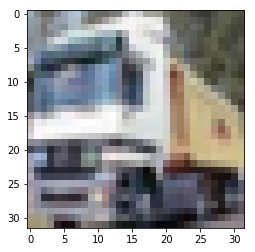

In [7]:
plt.imshow(X_train[1])
plt.show()

In [8]:
print('Label of image 0 is', y_train[1])

Label of image 0 is [9]


In [9]:
print(y_train[0])

[6]


In [10]:
np.max(X_train)

255

In [0]:
X_train_reshaped = X_train.reshape(50000, 32, 32, 3) / 255
X_test_reshaped = X_test.reshape(10000, 32, 32, 3) / 255

In [12]:
X_train_reshaped.shape

(50000, 32, 32, 3)

In [13]:
pd.DataFrame(y_train).head()

,0
0,6
1,9
2,9
3,4
4,1


## OneHot
Die verschiedenen Klassen werden onehot encoded.

In [14]:
from keras.utils import to_categorical

y_train_coded = to_categorical(y_train)
y_test_coded = to_categorical(y_test)

print(y_train_coded[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
pd.DataFrame(y_train_coded).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
def plot_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(history.history['loss'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylim([0, 2])
    ax[0].set_title('Loss over Epochs')
    ax[0].plot(history.history['val_loss'])
    ax[0].legend(['Training loss', 'Prediction loss'])

    ax[1].plot(history.history['acc'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylim([0, 1])
    ax[1].set_title('Accuracy over Epochs')
    ax[1].plot(history.history['val_acc'])
    ax[1].legend(['Training accuracy', 'Prediction accuracy'])

    fig.suptitle("Model Quality over Epochs")

    plt.show()

## Modell 1
Das erste Modell besteht aus 2 Conv Layern. Beim ersten wurde ein padding verwendet damit die Größe der Bilder gleich bleibt.  Um die Parameterzahl zu veringern wurde im ersten Layer ein stride von 2 verwendet und in beiden layern ein maxpooling von 2x2 Feldern. Vor dem Output wurde noch ein Flatten Layer eingefügt der die ausladenden Convoluts auf einen 1 dim array abbildet. Es konnte bereits eine val_acc von ca 56% erreicht werden.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

model_1 = Sequential()
model_1.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same', strides=2, dilation_rate=1))
model_1.add(MaxPool2D(2))
model_1.add(BatchNormalization())

model_1.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same', strides=1, dilation_rate=1))
model_1.add(MaxPool2D(2))
model_1.add(Flatten())
model_1.add(Dense(10, activation='softmax'))

W0724 15:41:53.141459 140185529960320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 15:41:53.156293 140185529960320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 15:41:53.158509 140185529960320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 15:41:53.173735 140185529960320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0724 15:41:53.188053 140185529960320 deprecation_wrapp

In [18]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 5)         140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 5)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 5)           20        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 15)          690       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2410      
Total para

In [19]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

W0724 15:41:53.966308 140185529960320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [20]:
model_1_training = model_1.fit(
    X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped, y_test_coded),
    epochs=25,
    batch_size=64
)

W0724 15:41:54.177929 140185529960320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.7250 - acc: 0.3831 - val_loss: 1.6505 - val_acc: 0.4256
Epoch 2/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.4833 - acc: 0.4742 - val_loss: 1.4436 - val_acc: 0.4865
Epoch 3/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.4065 - acc: 0.5037 - val_loss: 1.3836 - val_acc: 0.5127
Epoch 4/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.3589 - acc: 0.5213 - val_loss: 1.3829 - val_acc: 0.5097
Epoch 5/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.3265 - acc: 0.5334 - val_loss: 1.3569 - val_acc: 0.5171
Epoch 6/25
50000/50000 [==============================] - 5s 96us/step - loss: 1.3050 - acc: 0.5428 - val_loss: 1.3196 - val_acc: 0.5272
Epoch 7/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.2868 - acc: 0.5473 - val_loss: 1.3052 - val_ac

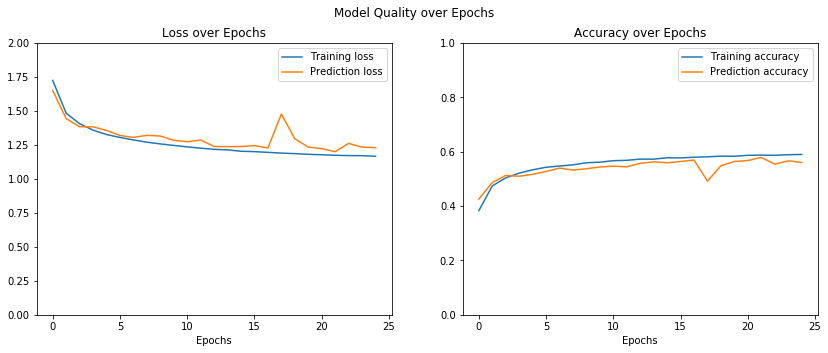

In [21]:
plot_history(model_1_training)

## Modell 2
Das zweite Modell baut auf Modell 1 auf, führt aber zusätzlich noch ein Dropout ein, der ein overfitting verhindern soll. Mit einer val_acc von ca. 64% ist dieses Modell bereits etwas besser als das Erste, hat aber auch 5000 Parameter mehr, die trainiert werden müssen.

In [22]:
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same', strides=2))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', dilation_rate=2))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(2))
model_2.add(Dropout(0.35))

model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))

W0724 15:43:56.959854 140185529960320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          4624      
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [0]:
model_2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [25]:
model_2_training = model_2.fit(
   X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped, y_test_coded),
    epochs=25,
    batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.9646 - acc: 0.3353 - val_loss: 1.5604 - val_acc: 0.4378
Epoch 2/25
50000/50000 [==============================] - 6s 117us/step - loss: 1.5070 - acc: 0.4573 - val_loss: 1.3320 - val_acc: 0.5234
Epoch 3/25
50000/50000 [==============================] - 6s 115us/step - loss: 1.3954 - acc: 0.4994 - val_loss: 1.4782 - val_acc: 0.4774
Epoch 4/25
50000/50000 [==============================] - 6s 117us/step - loss: 1.3394 - acc: 0.5228 - val_loss: 1.3412 - val_acc: 0.5156
Epoch 5/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.2985 - acc: 0.5397 - val_loss: 1.2309 - val_acc: 0.5716
Epoch 6/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.2653 - acc: 0.5494 - val_loss: 1.4318 - val_acc: 0.4929
Epoch 7/25
50000/50000 [==============================] - 6s 116us/step - loss: 1.2464 - acc: 0.5583 - val_loss: 1.1725 - 

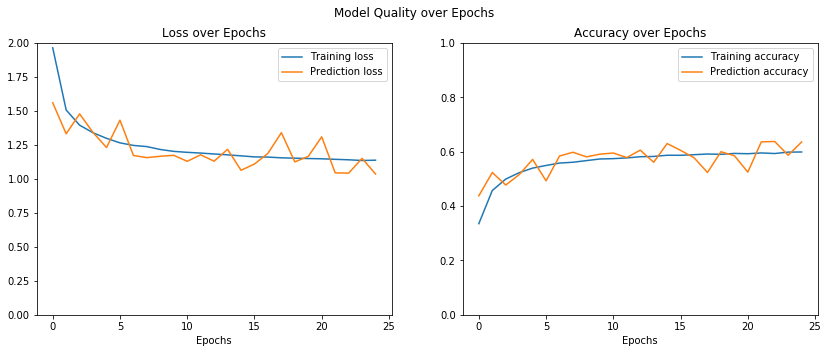

In [26]:
plot_history(model_2_training)

## Modell 3,
baut wiederum auf den 2. auf hat aber zusätzliche 2 Conv Layer, was sich in zusätzlichen 20000 Parametern und einer 76-prozentigen validation Genauigkeit wiederspiegelt.

In [0]:
model_3 = Sequential()

model_3.add(Conv2D(32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(2))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(2))
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(Dense(10, activation='softmax'))

In [28]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 16)        4624      
__________

In [0]:
model_3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
model_3_training = model_3.fit(
   X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped,y_test_coded),
    epochs=25,
    batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 192us/step - loss: 1.6827 - acc: 0.4374 - val_loss: 1.1919 - val_acc: 0.5772
Epoch 2/25
50000/50000 [==============================] - 9s 170us/step - loss: 1.1592 - acc: 0.5892 - val_loss: 1.1478 - val_acc: 0.5912
Epoch 3/25
50000/50000 [==============================] - 9s 171us/step - loss: 1.0043 - acc: 0.6455 - val_loss: 1.0652 - val_acc: 0.6256
Epoch 4/25
50000/50000 [==============================] - 9s 170us/step - loss: 0.9222 - acc: 0.6766 - val_loss: 0.8887 - val_acc: 0.6807
Epoch 5/25
50000/50000 [==============================] - 9s 171us/step - loss: 0.8733 - acc: 0.6949 - val_loss: 0.8630 - val_acc: 0.7014
Epoch 6/25
50000/50000 [==============================] - 8s 170us/step - loss: 0.8443 - acc: 0.7060 - val_loss: 0.8502 - val_acc: 0.7007
Epoch 7/25
50000/50000 [==============================] - 8s 170us/step - loss: 0.8134 - acc: 0.7180 - val_loss: 0.9548 -

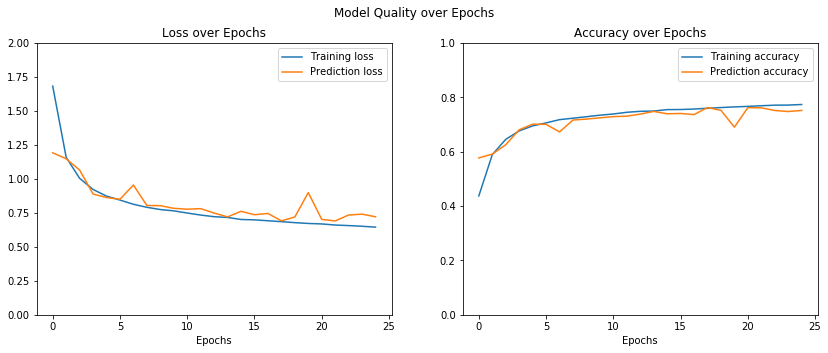

In [31]:
plot_history(model_3_training)

## Modell 4,
ist das letzte und mit 6 Conv Layern mit jeweils verdoppelter Neuronenzahl und mehreren Batch und Dropout layerm, das umfassendste Modell. Es hat 310.000 Parameter, die mit GPU Support dennoch recht schnell trainiert werden können. Das Resultat ist eine Testgenauigkeit von ca. 85%. 

In [0]:
model_4 = Sequential()

model_4.add(Conv2D(32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.2))

model_4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.4))

model_4.add(Flatten())
model_4.add(Dense(10, activation='softmax'))

In [34]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [0]:
model_4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [36]:
model_4_training = model_4.fit(
    X_train_reshaped,
    y_train_coded, 
    validation_data=(X_test_reshaped, y_test_coded),
    epochs=25,
    batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 13s 263us/step - loss: 1.7431 - acc: 0.4596 - val_loss: 1.9656 - val_acc: 0.4136
Epoch 2/25
50000/50000 [==============================] - 11s 227us/step - loss: 1.0657 - acc: 0.6398 - val_loss: 0.9977 - val_acc: 0.6601
Epoch 3/25
50000/50000 [==============================] - 11s 227us/step - loss: 0.8595 - acc: 0.7005 - val_loss: 0.7947 - val_acc: 0.7291
Epoch 4/25
50000/50000 [==============================] - 11s 227us/step - loss: 0.7463 - acc: 0.7402 - val_loss: 0.8185 - val_acc: 0.7274
Epoch 5/25
50000/50000 [==============================] - 11s 225us/step - loss: 0.6684 - acc: 0.7682 - val_loss: 0.7531 - val_acc: 0.7407
Epoch 6/25
50000/50000 [==============================] - 11s 227us/step - loss: 0.6177 - acc: 0.7844 - val_loss: 0.9365 - val_acc: 0.6945
Epoch 7/25
50000/50000 [==============================] - 11s 226us/step - loss: 0.5645 - acc: 0.8029 - val_loss: 0.

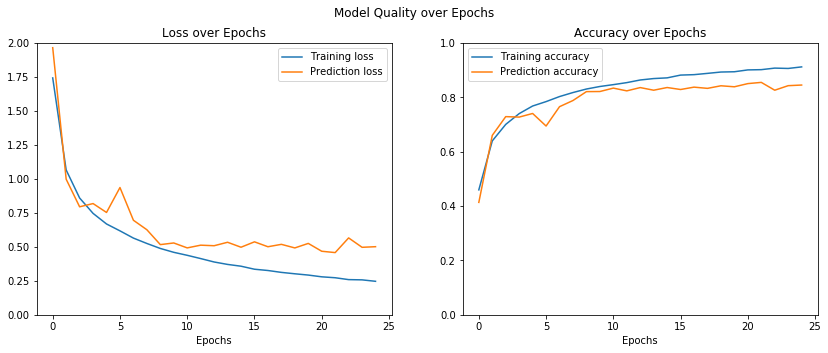

In [37]:
plot_history(model_4_training)